## Último punto del taller 2
### Tomás Urrego, Adrián Guerrero, Pablo Buitrago


    El código funciona con Julia, puede instalarse facilmente siguiendo los pasos
    encontrados en https://julialang.org/downloads/. Puede o correr el
    archivo `julia ultimo_punto_script.jl` o instalar el kernel de julia para Jupyter y 
    usar el notebook, lo cual se hace de la siguiente forma:

    * Abrir julia en la terminal: `julia`
    * escribir el siguiente comando para usar el gestor de paquetes: `import Pkg`
    * Agregar el kernel de julia para Jupyter: `Pkg.add("IJulia")`

    Bastaria entonces correr las celdas del notebook.

In [57]:
import Pkg
Pkg.add("PlotlyJS")
using PlotlyJS

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [58]:
"""
Function that calculates the utility matrix given the probability of bankruptcy.

Parameters
----------
alpha : Float64
    The probability that the airline goes bankrupt.

Returns
-------
Array
    A 4x2x2 array with the values of the utility matrix.
"""
function calculate_matrix(alpha::Float64)::Array
    my_matrix = zeros(4,2,2)
    #--------------- (S,S) -----------------
    # U_a((S,S),a)
    my_matrix[1,1,1] = alpha*4 + (1-alpha)*1
    # U_a((S,S),r)
    my_matrix[1,2,1] = alpha*(-1) + (1-alpha)*(-1)
    # U_b((S,S),a)
    my_matrix[1,1,2] = alpha*3 + (1-alpha)*(-2)
    # U_b((S,S),r)
    my_matrix[1,2,2] = alpha*2 + (1-alpha)*2
    #--------------- (S,N) -----------------
    # U_a((S,N),a)
    my_matrix[2,1,1] = alpha*4 + (1-alpha)*(-0.5)
    # U_a((S,N),r)
    my_matrix[2,2,1] = alpha*(-1) + (1-alpha)*(-0.5)
    # U_b((S,N),a)
    my_matrix[2,1,2] = alpha*3 + (1-alpha)*0
    # U_b((S,N),r)
    my_matrix[2,2,2] = alpha*2 + (1-alpha)*0
    #--------------- (N,S) -----------------
    # U_a((N,S),a)
    my_matrix[3,1,1] = alpha*(-2) + (1-alpha)*1
    # U_a((N,S),r)
    my_matrix[3,2,1] = alpha*(-2) + (1-alpha)*(-1)
    # U_b((N,S),a)
    my_matrix[3,1,2] = alpha*0 + (1-alpha)*(-2)
    # U_b((N,S),r)
    my_matrix[3,2,2] = alpha*0 + (1-alpha)*2
    #--------------- (N,N) -----------------
    # U_a((N,N),a)
    my_matrix[4,1,1] = alpha*(-2) + (1-alpha)*(-0.5)
    # U_a((N,N),r)
    my_matrix[4,2,1] = alpha*(-2) + (1-alpha)*(-0.5)
    # U_b((N,N),a)
    my_matrix[4,1,2] = alpha*0 + (1-alpha)*0
    # U_b((N,N),r)
    my_matrix[4,2,2] = alpha*0 + (1-alpha)*0

    return my_matrix
end


################ HERE YOU CHANGE THE VALUE OF ALPHA ################
# Calculate the utility matrix given alpha
alpha = 1/3
utility_matrix = calculate_matrix(alpha)

4×2×2 Array{Float64, 3}:
[:, :, 1] =
  2.0          -1.0
  1.0          -0.666667
  1.11022e-16  -1.33333
 -1.0          -1.0

[:, :, 2] =
 -0.333333  2.0
  1.0       0.666667
 -1.33333   1.33333
  0.0       0.0

In [59]:
# Calculate the intercepst for the envelope plot given λ as the probability that the
# bank will give a loan to the airline

"""
Function that calculates the intercepts of the envelope plot. When λ = 0, the intercept
is the utility of the airline when the bank gives a loan to the airline. When λ = 1, the
intercept is the utility of the airline when the loan is rejected.

Parameters
----------
M : Array
    The utility matrix.

Returns
-------
Matrix
    A 4x2 matrix with the intercepts of the envelope plot
"""
function calculate_intercepts(M::Array)::Matrix
    intercepts = zeros(size(M[:,:,1]))
    #--------------- intercept with 0 -----------------
    for λ in 0:1
        for i in 1:4
            intercepts[i,λ+1] = λ*M[i,1,1] + (1-λ)*M[i,2,1]
        end
    end
    return intercepts
end

intercepts = calculate_intercepts(utility_matrix)


4×2 Matrix{Float64}:
 -1.0        2.0
 -0.666667   1.0
 -1.33333    1.11022e-16
 -1.0       -1.0

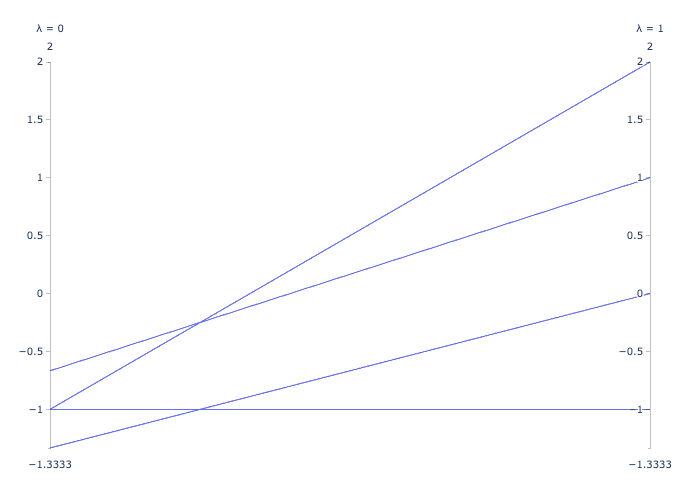

In [60]:
# Get the ranges
ub = maximum([maximum(intercepts[:,1]), maximum(intercepts[:,2])])
lb = minimum([minimum(intercepts[:,1]), minimum(intercepts[:,2])])
# Make a parallel coordinates plot with the intercepts, with thick lines



p = parcoords(;
    dimensions = [
        attr(range = [lb, ub], label = "λ = 0", values = intercepts[:,1]),
        attr(range = [lb, ub], label = "λ = 1", values = intercepts[:,2])
    ]
)
plot(p)